# Load data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sortedcontainers import SortedList

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Balancing Training data

In [12]:
positives = df[df['Outcome']==1]
negatives = df[df['Outcome']==0]

In [14]:
negatives = negatives.sample(len(positives))

In [15]:
df = positives.append(negatives)

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
463,5,88,78,30,0,27.6,0.258,37,0
707,2,127,46,21,335,34.4,0.176,22,0
594,6,123,72,45,230,33.6,0.733,34,0
504,3,96,78,39,0,37.3,0.238,40,0


# Split to Train-test sets

In [19]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

(536, 8)
(536,)


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle = True)

# Define KNN algorithm

In [247]:
def euclidean_distance(vec_1,vec_2):
    distance = np.sum((vec_1-vec_2)**2)
    return np.sqrt(distance)

In [248]:
def fetch_neighbours(test_vector,train_data,K):
    i = 0
    distances = SortedList(key=lambda x: x[1])
    neighbours = []
    for row in train_data: # loop through training data
        distance = euclidean_distance(test_vector,row)
        distances.add((i,distance))
        i += 1
    
    #distances.sort(key=lambda x: x[1])
    
    neighbours = distances[:K]
    
    return neighbours
    

In [249]:
def predict(test_vector,train_data,train_labels,K):
    neighbours = fetch_neighbours(test_vector,train_data,K)
    
    labels = [train_labels[index] for index,distance in neighbours]
    
    return max(set(labels), key = labels.count)

In [250]:
#lab = predict(X_test[6],X_train,y_train,300)

In [265]:
def get_accuracy(test_data,test_labels,train_data,train_labels,K):
    predictions = []
    for example in test_data:
        prediction = predict(example,train_data,train_labels,K)
        predictions.append(prediction)
    
    predictions = np.array(predictions)
    count = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            count += 1
    
    return str(np.sum(predictions==test_labels)/len(test_labels)*100) + ' %'
            

# Test on test set for accuracies in range 1 to 100

In [252]:
accuracies = [] # try to get accuracy for all neighbour values in the range 1 to 100
for i in range(1,100):
    accuracies.append(get_accuracy(X_test,y_test,X_train,y_train,i))

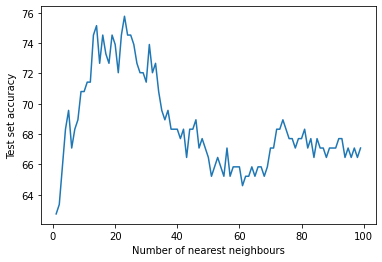

In [259]:
plt.plot(range(1,100),accuracies)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Test set accuracy')
plt.show()

In [266]:
print(get_accuracy(X_test,y_test,X_train,y_train,23))

75.77639751552795 %
